In [1]:
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd

DATA_BASE_FOLDER = 'data/'
SAMPLE_RATE = 16000
HOP_LEN = 512

In [2]:
# Load annotations
df_train = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'train.csv'))
df_validation = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'validation.csv'))
labels = sorted(list(set(df_train['word'].values)))
y_train = df_train['word'].map(lambda w: labels.index(w)).values
y_validation = df_validation['word'].map(lambda w: labels.index(w)).values

# Load audio
audio_train = np.load(os.path.join(DATA_BASE_FOLDER, 'train_audio.npy'))

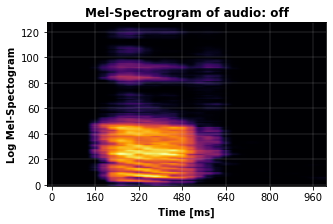

In [3]:
# Load Features
x_train_raw = np.load(os.path.join(DATA_BASE_FOLDER, 'train_feat.npy'))
x_validation_raw = np.load(os.path.join(DATA_BASE_FOLDER, 'validation_feat.npy'))

# Plot audio feature
idx = 1205
time = np.arange(1, SAMPLE_RATE + 1, HOP_LEN) / SAMPLE_RATE
plt.figure(figsize=(5, 3))
plt.title(f'Mel-Spectrogram of audio: {df_train["word"][idx]}', fontweight='bold')
plt.imshow(x_train_raw[idx], aspect='auto', origin='lower', cmap='inferno')
xticks = plt.xticks()[0].astype(np.int32)
plt.xticks(xticks[1:-1], [f'{1000 * t:.0f}' for t in time[xticks[1:-1]]])
plt.xlabel('Time [ms]', fontweight='bold')
plt.ylabel('Log Mel-Spectogram', fontweight='bold')
plt.grid(lw=0.4, c='w', alpha=0.4)
plt.show()

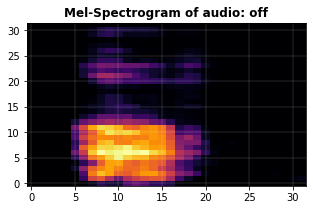

In [4]:
# Resize the features
x_train = []
for x_i in x_train_raw:
    x_train += [cv2.resize(x_i, (32, 32))]
x_train = np.array(x_train)
x_validation = []
for x_i in x_validation_raw:
    x_validation += [cv2.resize(x_i, (32, 32))]
x_validation = np.array(x_validation)

# Plot audio feature
idx = 1205
plt.figure(figsize=(5, 3))
plt.title(f'Mel-Spectrogram of audio: {df_train["word"][idx]}', fontweight='bold')
plt.imshow(x_train[idx], aspect='auto', origin='lower', cmap='inferno')
plt.grid(lw=0.4, c='w', alpha=0.4)
plt.show()

In [5]:
# Flatten the features
x_train = x_train.reshape(x_train.shape[0], -1)
x_validation = x_validation.reshape(x_validation.shape[0], -1)

print(f'Features dimension size: {x_train.shape[-1]}')

Features dimension size: 1024


In [6]:
print('X train shape: {} '.format(x_train.shape))
print('X validation shape: {} '.format(x_validation.shape))
print('y train shape: {} '.format(y_train.shape))
print('y validation shape: {} '.format(y_validation.shape))

X train shape: (1600, 1024) 
X validation shape: (109, 1024) 
y train shape: (1600,) 
y validation shape: (109,) 


In [11]:
from numpy import savetxt

savetxt('processed_data/x_train.csv', x_train, delimiter=',')
savetxt('processed_data/x_validation.csv', x_validation, delimiter=',')
savetxt('processed_data/y_train.csv', y_train, delimiter=',')
savetxt('processed_data/y_validation.csv', y_validation, delimiter=',')